# Modelo de Práctico Análisis y Visualización de Datos 

El *dataset* contiene las siguientes columnas:

- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **Mag_u,Mag_g,Mag_r,Mag_i,Mag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **z** = Es una medida de la distancia a la que se encuentra la galaxia
- **R** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendran el valor 0. 

# Paquetes 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import scipy as sp
import numpy as np
import matplotlib.patches as mpatches


# Carga de Datos

In [2]:
url = 'https://raw.githubusercontent.com/francozacco/mentorias_diplodatos_2019/master/TP01/galaxias.csv'
data = pd.read_csv(url, sep=',')

In [3]:
display('Head',data.head(4))
display('Tamaño',data.shape)
display('Valores faltantes',data.notnull().all().to_frame())
display('Estadísticos del dataset',data.describe())

'Head'

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0
2,131.396389,53.550571,18.85028,17.48945,16.96463,16.68431,16.50479,10.350600,0.045041,-1.885653,0,1,0
3,129.384163,55.251341,19.29007,17.38153,16.52590,16.11502,15.78828,5.981402,0.045485,-2.764166,0,0,1


'Tamaño'

(92102, 13)

'Valores faltantes'

,0
ra,True
dec,True
Mag_u,True
Mag_g,True
Mag_r,True
Mag_i,True
Mag_z,True
R,True
z,True
color,True


'Estadísticos del dataset'

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
count,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000
mean,181.086338,24.723737,18.143378,16.708392,16.312647,15.991780,15.433421,9.459875,0.036092,-1.830732,0.089651,0.326225,0.584124
std,61.177151,18.853785,46.690487,46.684358,1.092588,1.151259,57.168725,5.248708,0.008435,46.686363,0.285682,0.468833,0.492875
min,0.008745,-11.202394,-9999.000000,-9999.000000,11.524090,11.220580,-9999.000000,0.842248,0.020001,-13.484570,0.000000,0.000000,0.000000
25%,150.287271,9.115292,17.725203,16.251015,15.562648,15.197173,14.910782,6.117608,0.029082,-2.510555,0.000000,0.000000,0.000000
50%,183.219954,23.111344,18.442490,17.082385,16.491180,16.171225,15.934050,8.361149,0.036321,-1.994779,0.000000,0.000000,1.000000
75%,222.722975,38.982500,19.028265,17.720817,17.209297,16.928400,16.736465,11.345535,0.043620,-1.606971,0.000000,1.000000,1.000000
max,359.965567,70.133213,28.787190,25.526970,27.911470,25.657780,26.923540,231.121800,0.050000,10015.860000,1.000000,1.000000,1.000000


# Clases

Defino una nueva columna de tipo categórico para concatenar la clase o tipo morfologíco de las galaxias.

In [4]:
clase=[]
for i in range(0,data.shape[0]):
    if data.eliptica[i]==1:
        clase.append('E')
    elif data.espiral[i]==1:
        clase.append('S')
    elif data.irregular[i]==1:
        clase.append('I')
data['clase']=clase
data.head(10)

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular,clase
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1,I
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0,S
2,131.396389,53.550571,18.85028,17.48945,16.96463,16.68431,16.50479,10.350600,0.045041,-1.885653,0,1,0,S
3,129.384163,55.251341,19.29007,17.38153,16.52590,16.11502,15.78828,5.981402,0.045485,-2.764166,0,0,1,I
4,129.945145,55.628530,18.08747,16.73876,16.16752,15.83606,15.55770,8.978182,0.035336,-1.919950,0,1,0,S
5,131.328756,55.842499,18.93437,17.23941,16.45432,16.02061,15.70122,5.162340,0.044426,-2.480055,0,1,0,S
6,132.234271,55.135706,18.60261,16.86640,16.08706,15.70185,15.38955,7.045557,0.030671,-2.515554,0,1,0,S
7,130.242257,52.871736,18.44686,16.78795,16.00473,15.60493,15.23374,6.949870,0.043900,-2.442131,0,0,1,I
8,133.017396,52.566768,18.97409,17.82834,17.37524,17.13555,16.88875,5.847063,0.047060,-1.598846,0,0,1,I
9,133.395285,52.532760,18.93884,17.45655,16.67665,16.27514,15.93159,7.389670,0.030417,-2.262188,0,1,0,S


# Visualización

Encuentre una forma adecuada para exhibir el balance de las clase eliptica (E), espiral (S) e irregular (I) usando la nueva columna clase.

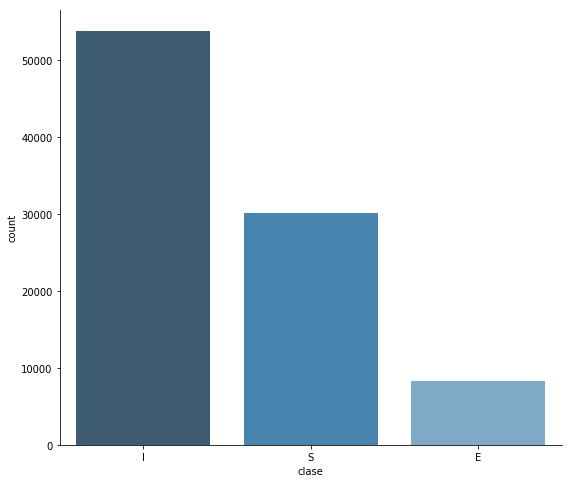

In [5]:
data_count = pd.DataFrame(data['clase'].value_counts())
data_count.columns = ['count']
data_count.index.name = 'clase'
data_count.reset_index(inplace=True)
plt.figure(figsize=(9,8))
seaborn.barplot(x='clase',
                y='count',
                data=data_count,
                palette='Blues_d')
seaborn.despine()

Use histogramas y boxplots para visualizar intervalos de confianza, mediana, media, intercuartiles y *outliers* de la posición **z** y del tamaño **R** para algun tipo morfologíco.

/home/franco/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


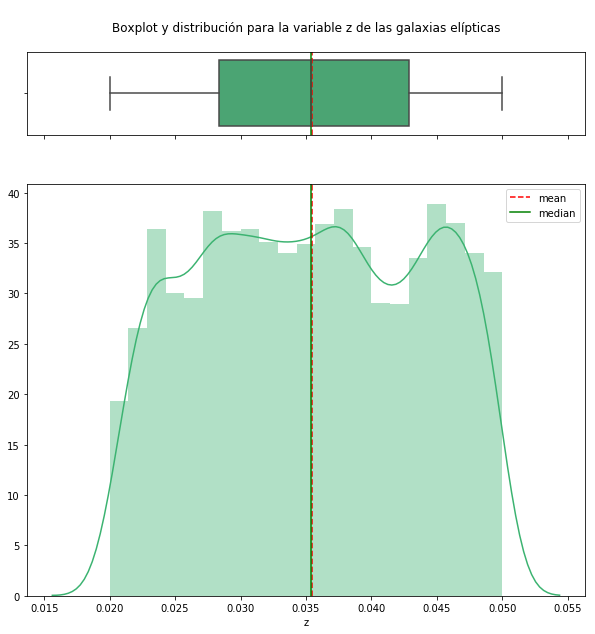

In [6]:
ze_only = data[data['clase'] == 'E'][['z']]

f, (ax_box, ax_hist) = plt.subplots(2, 
                                    figsize=(10,10),
                                    sharex=True,
                                    gridspec_kw= {"height_ratios": (0.2, 1)})
z_mean = ze_only['z'].mean()
z_median = ze_only['z'].median()

seaborn.boxplot(ze_only['z'],
                ax=ax_box,
                color='mediumseagreen').set_title(
                '\nBoxplot y distribución para la variable z de las galaxias elípticas\n')
ax_box.axvline(z_mean, color='r', linestyle='--')

ax_box.axvline(z_median, color='g', linestyle='-')

seaborn.distplot(ze_only['z'],
                 ax=ax_hist,
                 color='mediumseagreen')
ax_hist.axvline(z_mean, color='r', linestyle='--')
ax_hist.axvline(z_median, color='g', linestyle='-')

plt.legend({'mean':z_mean,'median':z_median})

ax_box.set(xlabel='')
plt.show()

/home/franco/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


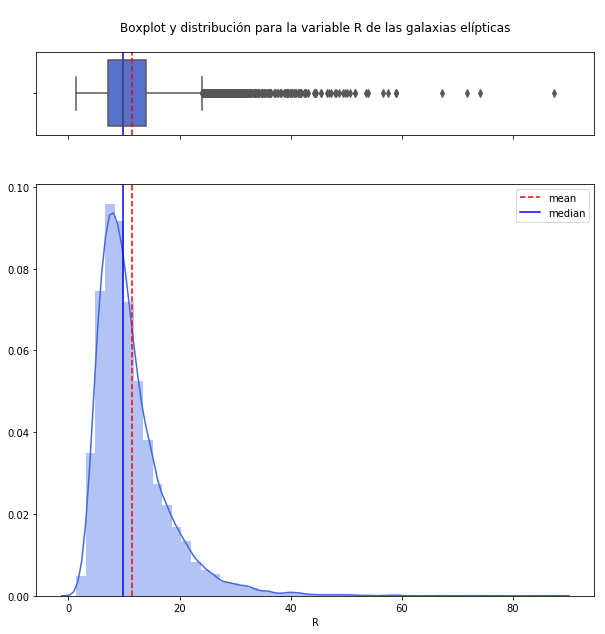

In [7]:
Re_only = data[data['clase'] == 'E'][['R']]

f, (ax_box, ax_hist) = plt.subplots(2,
                                    figsize=(10,10),
                                    sharex=True,
                                    gridspec_kw= {"height_ratios": (0.2, 1)})
R_mean = Re_only['R'].mean()
R_median = Re_only['R'].median()

seaborn.boxplot(Re_only['R'],
                ax=ax_box,
                color='royalblue').set_title(
                '\nBoxplot y distribución para la variable R de las galaxias elípticas\n')
ax_box.axvline(R_mean, color='r', linestyle='--')
ax_box.axvline(R_median, color='b', linestyle='-')

seaborn.distplot(Re_only['R'],
                 ax=ax_hist,
                 color='royalblue')
ax_hist.axvline(R_mean, color='r', linestyle='--')
ax_hist.axvline(R_median, color='b', linestyle='-')

plt.legend({'mean':R_mean,'median':R_median})

ax_box.set(xlabel='')
plt.show()


Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

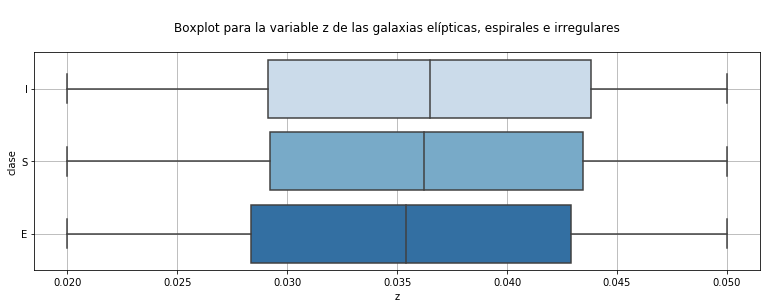

In [8]:
z_only = data[['clase','z']]

fig, ax1 = plt.subplots(figsize=(13,4))

seaborn.boxplot(x='z',
                y='clase',
                data=z_only,
                ax=ax1,
                palette='Blues').set_title(
                '\nBoxplot para la variable z de las galaxias elípticas, espirales e irregulares\n')
ax1.grid()
ax1.set_axisbelow(True)
plt.show()


# Valores característicos 

Mostrar los valores explícitos característicos de la distribución **z** de las galaxias elípticas, espirales, irregulares.

In [9]:
ze_only = data[data['clase'] == 'E'][['z']]
zs_only = data[data['clase'] == 'S'][['z']]
zi_only = data[data['clase'] == 'I'][['z']]

z_stats = ze_only.describe()
z_stats.columns = ['Elipticas']

zs_stats = zs_only.describe()['z']

zi_stats = zi_only.describe()['z']

z_stats['Espirales'] = zs_stats 
z_stats['Irregulares'] = zi_stats

index = ['median']
z_medians = pd.DataFrame({'Elipticas': [ze_only.median()['z']],
                         'Espirales': [zs_only.median()['z']],
                         'Irregulares': [zi_only.median()['z']]},
                          index=index)

z_stats.append(z_medians)

,Elipticas,Espirales,Irregulares
count,8257.000000,30046.000000,53799.000000
mean,0.035441,0.036080,0.036198
std,0.008377,0.008375,0.008473
min,0.020001,0.020001,0.020002
25%,0.028338,0.029204,0.029136
50%,0.035387,0.036243,0.036516
75%,0.042901,0.043443,0.043803
max,0.049999,0.049999,0.050000
median,0.035387,0.036243,0.036516


# Distribución Normal

- Grafique la distribución Normal variando sus estadísticos. Realice una breve descripción de los cambios que nota en estos.

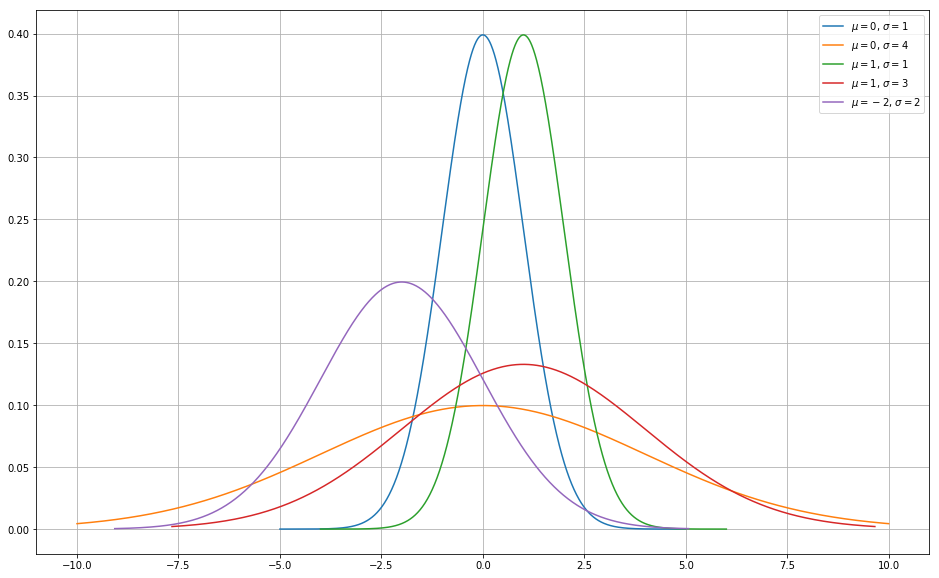

In [10]:
norm_params = [(0,1), (0,4), (1,1), (1,3), (-2,2)]
plt.figure(figsize=(16,10))
for loc, scale in norm_params:
    sd = scale**0.5
    norm = sp.stats.norm(loc=loc, scale=scale)
    x = np.linspace(loc-5*sd, loc+5*sd, 1000)
    plt.plot(x, norm.pdf(x), label=fr"$\mu={loc}$, $\sigma={scale}$")

plt.legend(loc=0)
plt.grid()


En el gráfico anterior se observan diferentes distribuciones normales con distintas medias ($\mu$) y desviaciones estandars ($\sigma$). Se puede ver que la variación de la media desplaza la campana sobre el eje horizontal, mientras que la desviación estandar nos indica que tan ancha o distribuida va a ser la campana, cuanto más grande el $\sigma$ más ancha es la campana


## Valores Faltantes 

Algunos valores físicos de las galaxias no pueden ser determinados. Muchas veces la alternativa al usual *NaN* es llenar la celda del valor faltante con cero o con números de valor muy grande o muy chico discordantes a los valores usuales que toma la cantidad física. 

Se puede optar por ignorar dicho número o remplazarlo por cero, el valor medio o eliminarlo en el caso que el dataset sea de una gran dimensión.

El caso anteriormente se observa con la variable *color* donde dos de las galaxias no tienen su color determinado. 

- Dele solución 
- Ajuste la distribución de la variable **color** con el tamaño del bin=0.1 a una Normal usando *sns.distplot* 
- Explique que observa

In [11]:
data['color'].describe()

count    92102.000000
mean        -1.830732
std         46.686363
min        -13.484570
25%         -2.510555
50%         -1.994779
75%         -1.606971
max      10015.860000
Name: color, dtype: float64

Se puede ver que el valor máximo dista mucho de la media y los cuartiles. Nos da una pista que puede ser que un valor faltante rellenada con un valor muy grande

In [12]:
data[data['color'] > 10]

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular,clase
4020,209.589671,-0.625217,-9999.0,-9999.0,16.85656,16.53999,-9999.0,6.973291,0.027598,10015.86,0,0,1,I
4021,209.589671,-0.625217,-9999.0,-9999.0,16.85656,16.53999,-9999.0,6.973291,0.027604,10015.86,0,0,1,I


Vemos estas filas con valores muy grandes. Eliminamos esas filas del dataset ya que solo son 2 y el dataset es grande

In [13]:
mask = data['color'] > 10
data = data[~mask]

/home/franco/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


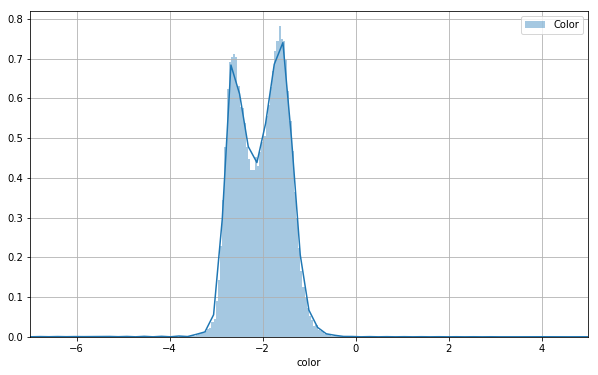

In [14]:
plt.figure(figsize=(10,6))
seaborn.distplot(data["color"],bins=500, label="Color")
plt.xlim(-7,5)
plt.grid()
plt.legend(loc=0)

La distribución del color para todas las galaxias parecen ser 2 o más distribuciones superpuestas. Vemos como es la distribución del color para las diferentes morfologías

In [15]:
irregular = data[data["clase"]=="I"]
eliptic = data[data["clase"]=="E"]
spiral = data[data["clase"]=="S"]

/home/franco/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/franco/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/franco/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


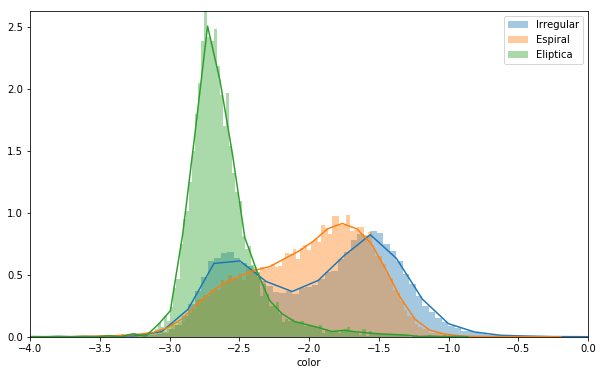

In [16]:
plt.figure(figsize=(10,6))
seaborn.distplot(irregular["color"],bins=500, label="Irregular")
seaborn.distplot(spiral["color"],bins=500, label="Espiral")
seaborn.distplot(eliptic["color"],bins=500, label="Eliptica")
plt.xlim(-4,0)
plt.legend(loc=0)

En primer lugar, sabemos que cuanto más negativa es la variable color, más roja es la luz que llega de la galaxia. Por otro lado, conocemos que las estrellas más viejas son más rojas, mientras que las estrellas más jovenes son más azules.

Teniendo en cuenta estos 2 puntos y observando el gráfico anterior, podemos decir que en general las galaxias elipticas se formaron en etapas más tempranas del universo, mientras que las espirales lo hicieron más tarde. Otra forma de explicar esta situación es mirando el polvo y gas libre en la galaxia que permite el nacimiento de nuevas estrellas. En las galaxías elipticas hay poco gas y polvo libre, ya que fue utilizado es epocas anteriores para formar estrellas y con esa poca concentracion de gas y polvo la tasa de nacimiento de nuevas estrellas es muy baja. En el lado opuesto estan las galaxias espirales, donde hay más cantidad de polvo y gas libre que permite el nacimiento de nuevas estrellas.

Por otro lado en las galaxias irregulares podemos ver tanto galaxias jovenes como viejas. Este tipo de galaxias suele presentar contenido de gas y polvo suficiente para que se formen nuevas estrellas, aunque algunas no lo hacen siempre, como por ejemplo las galaxias irregulares enanas.


Del gráfico anterior es obvio que la distribución del color no es normal para las galaxias irregulares. Veamos que pasa para las elipticas y las espirales

-2.6360022177788545 0.34585388531511385
-2.026176477041869 0.518555798174699


/home/franco/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/franco/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


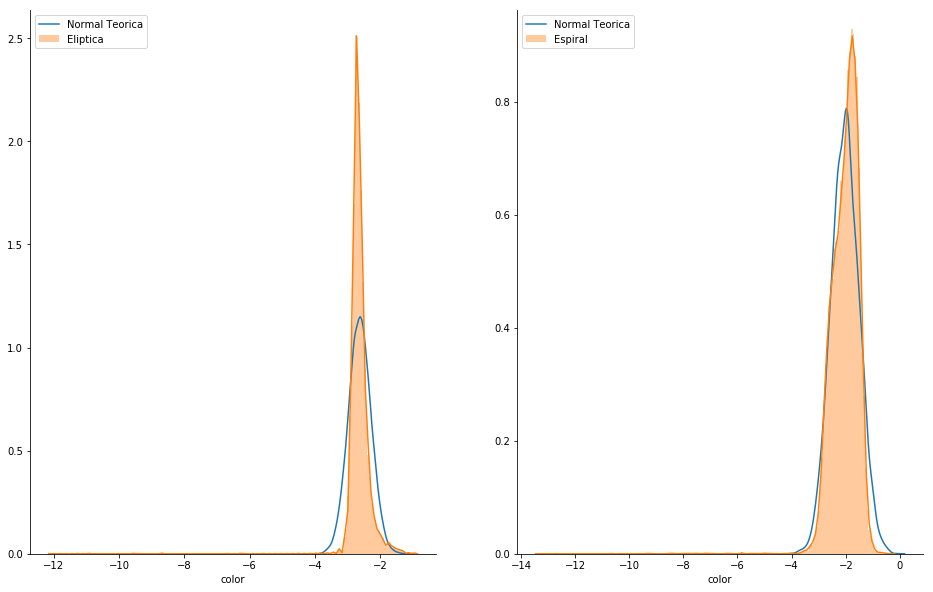

In [17]:
# Fitting to a normal distribution
paramsE = sp.stats.norm.fit(eliptic["color"])
paramsS = sp.stats.norm.fit(spiral["color"])
print(*paramsE)
print(*paramsS)
# Tackning samples with the fitted parameters
norm_distE = sp.stats.norm(*paramsE)
sampleE = norm_distE.rvs(10000)
norm_distS = sp.stats.norm(*paramsS)
sampleS = norm_distS.rvs(10000)

fig = plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
seaborn.distplot(sampleE,label="Normal Teorica",hist=False)
seaborn.distplot(eliptic["color"], label="Eliptica",bins=200)
plt.legend(loc=0)

plt.subplot(1,2,2)
seaborn.distplot(sampleS,label="Normal Teorica",hist=False)
seaborn.distplot(spiral["color"], label="Espiral",bins=200)

plt.legend(loc=0)
seaborn.despine()


A simple vista podemos decir que la distribución del color de las galaxias elípticas no se ajustan muy bien a la normal, pero en las espirales parace haber un mejor ajuste. Los comprobamos utilizando un test de Kolmogorov-Smirnov comparando con la distribución normal. El tests nos plantea las siguientes hipotesis:

$H_0: $ La distribución es Normal

$H_a: $ La distribución no es Normal

In [18]:
print(sp.stats.kstest(sp.stats.zscore(eliptic["color"]),"norm"))
print(sp.stats.kstest(sp.stats.zscore(spiral["color"]),"norm"))

KstestResult(statistic=0.1581865119192125, pvalue=6.883279270101887e-180)
KstestResult(statistic=0.06085597286641031, pvalue=4.4647706287249846e-97)


Viendo que el P-Valor es mucho menor que 0.05 en ambos casos, descartamos la hipotesis nula y decimos ninguna de las distribuciones es normales

# Probabilidad

- Calcule la Probabilidad marginal de cada tipo morfologico y grafiquela.

In [30]:
marginal_probs = data.groupby('clase').size().div(len(data))
marginal_probs



clase
E    0.089653
I    0.584115
S    0.326232
dtype: float64

In [35]:
marginal_probs.to_frame().reset_index()

,clase,0
0,E,0.089653
1,I,0.584115
2,S,0.326232


In [58]:
marg_prob_df = marginal_probs.to_frame().reset_index()

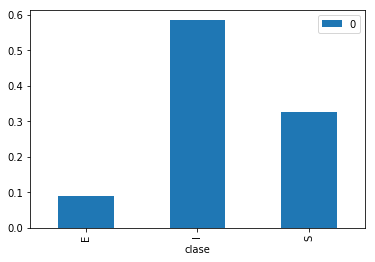

In [63]:
marg_prob_df.plot(x="clase", kind='bar', stacked=True,)
#marginal_probs

- Calcule la probabilida conjunta las galaxias de clase = E con el color  mayor a -2.1

In [64]:
data[(data["clase"]=="E") & (data["color"]>-2.1)].size / len(data)

0.050770901194353964

- Analice la correlación entre dos de las variables a través de chi-cuadrado. Muestre esta correlación a través de mapas de calor.

La correlación utilizando Chi Cuadrado aplica a variables categóricas. Como solo tenemos 1 variable categórica (la clase/morofología de la galaxia) creeamos otro que es el nombre del color, que puede tomar valores "rojo" o "azul" de acuerdo al valor de la variable color

In [65]:
data["color_name"] = data["color"].apply(lambda row: "red" if row <-2.3 else "blue")

Armamos la tabla de contigencia

In [68]:
conting_table = pd.crosstab(data["clase"], data["color_name"])
conting_table

color_name,blue,red
clase,,
E,656,7601
I,35967,17830
S,21860,8186


Calculamos el chi cuadrado para ver la independecia de las variables. Este tets plantea las siguientes 2 hipotesis:

$H_0: $ Las variables son independientes

$H_a: $ Las variables son dependientes

In [90]:
stat, pval, dfree, exptab = sp.stats.chi2_contingency(conting_table)

In [91]:
print(f"Estadistico: {stat}")
print(f"P-Valor: {pval}")
print(f"Grados de Libertad: {dfree}")
print(f"Tabla Esperada: \n {exptab}")


Estadistico: 12367.148144152534
P-Valor: 0.0
Grados de Libertad: 2
Tabla Esperada: 
 [[ 5243.15017372  3013.84982628]
 [34160.80294245 19636.19705755]
 [19079.04688382 10966.95311618]]


Como el P-Valor es 0, podemos rechazar la hipotesis nula y decimos que las variables son dependientes. Esto es algo esperado, ya que como vimos anteriormente existe una dependencia entre la morfología de la galaxias y el color predominante

## Mapa de Calor

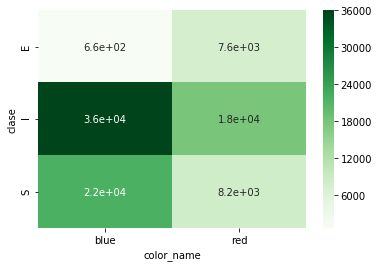

In [95]:
seaborn.heatmap(conting_table,annot=True,cmap="Greens")

Un buen recurzo para mostrar los resultados de correlaciones suele ser el mapa de calor, pero en este caso resulta engañoso ya que a primera vista nos muestra que existe una correlación debil entre las galaxias elipicas y espirales con los colores de las mismas. Esto se debe a que la probabilidad marginal de ese tipo de galaxias es bajo respecto a las irregulares, que es donde parece haber mayor correlación. Para corregir esto balanceamos las muestras por galaxia

In [104]:
conting_table_norm = conting_table.div(conting_table.sum(axis=1), axis=0)
conting_table_norm

color_name,blue,red
clase,,
E,0.079448,0.920552
I,0.668569,0.331431
S,0.727551,0.272449


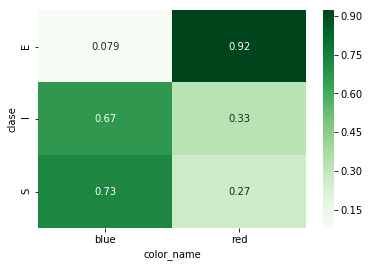

In [109]:
seaborn.heatmap(conting_table_norm,annot=True,cmap="Greens")

De esta forma la situación mejora norotramiente, y el gráfico muestra el resultado correctamente